# CSE428 Week 3 Coding Assignment

In [ ]:
NAME = "Labib Ahmed Siddique"
ID = "18101478"
COLLABORATORS_ID = ["", ""]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This assignment contains 4 tasks. Complete the notebook with proper codes for the lines with `# TO-BE-COMPLETED` tag, or by *uncommenting* a partially written codes where necessary.

Background: We larned in class that linear spatial filtering is basically a signal correlation opration between an image and a filter kernel. To filter an ```image``` with a ```kernel``` all we need to do is call the ```signal.correlate``` function from the ```scipy``` library.

```
filtered_image = signal.correlate(image, kernel, mode='same', method='auto')
```
Here, ```mode="same"``` takes care of the image padding under the hood; making the filtered image the *same shape* as the input image, while ```mode="valid"``` *shrinks the filtered image*. The ```method='direct'``` implements the correlation from the definition of signal correlation:

> $g(x, y)=\sum_{s,t}{w(s, t)}f(x+s, y+t)$

whereas ```method='fft'``` uses a frequency domain implementation which we will learn next week. The ```method='auto'``` chooses the faster implementation automatically. <br>
(Except for **Task 1**, always use ```method='auto'``` while using the correlation function )


 

We use the following code stucture to measure the excecution time of some python code:

```
import time

start_time = time.clock()

# some python code

print("Time elapsed: ", time.clock() - start_time, "seconds")
```


## **Task 0: The Imports** <br>
### Import the necessary libraries and define the helper functions. You can use the helper functions from the coding tutorials, or you can even use your own version of helper functions. <br>


In [8]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.io import imread , imshow
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage.util import random_noise
from scipy import signal
import matplotlib.pyplot as plt

In [3]:
# Define helper functions
def plot_image(img,figsize=(5,5)):
    plt.figure(figsize=figsize)
    if len(img.shape)==2:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img)
    plt.axis("off")
    plt.show()
    print("Image shape: ", img.shape)

def plot_kernel(kernel, cmap="Reds"):
    plt.imshow(kernel, interpolation='none', cmap="Reds")
    plt.colorbar()
    plt.show()
    print("Kernel shape: ", kernel.shape)

def gaussian_kernel(width=1, size=10):
    gaussian1dkernel = signal.gaussian(size, width).reshape(size, 1)
    kernel = np.outer(gaussian1dkernel, gaussian1dkernel)
    return kernel/np.sum(kernel)

def box_kernel(size=5):
    return np.ones((size, size))/size**2

## **Task 1: Execution Time** <br>
### Excecution time comparison for the 2 different methods of the correlation function <br>


In [37]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.

image = imread('/content/drive/MyDrive/dante (1).jpg')# TO-BE-COMPLETED
I=  image
#I.shape
#imshow(I)

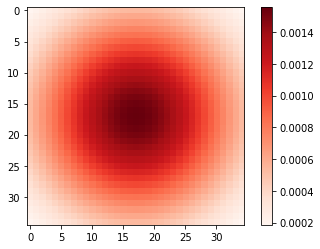

Kernel shape:  (35, 35)


In [21]:
# Define a gaussian kernel of size (35, 35)
k = 35
kernel = k
# kernel shape (k, k). k should be odd


# spread for gaussian, spread > 1
spread = k/3 # or define manually


# define kernel
kernel = gaussian_kernel(spread, size=k)

plot_kernel(kernel)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


Time elapsed using direct method of correlation:  14.861126999999996 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


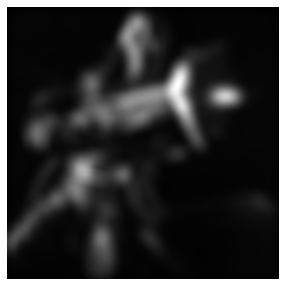

Image shape:  (500, 500)


In [22]:
# Determine the time to filter the image with the kernel using "direct" method

import time
 
start_time = time.clock()
 
filetred_image_direct = np.zeros(I.shape) # TO-BE-COMPLETED
for i in range(0,3):
    filtered_image_direct = signal.correlate(I[:,:,i], kernel, mode='same', method='direct') 
print("Time elapsed using direct method of correlation: ", time.clock() - start_time, "seconds")
plot_image(filtered_image_direct)


Time elapsed using fft method of correlation:  0.08526600000000428 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


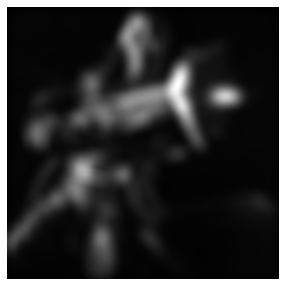

Image shape:  (500, 500)


In [23]:
# Determine the time to filter the image with the kernel using "fft" method
 
start_time = time.clock()
 
filetred_image_fft = np.zeros(I.shape)  # TO-BE-COMPLETED
for i in range(0,3):
    filetred_image_fft = signal.correlate(I[:,:,i], kernel, mode='same', method='fft')
 
print("Time elapsed using fft method of correlation: ", time.clock() - start_time, "seconds")
plot_image(filetred_image_fft)

### **Answer to Task 1** <br>

### Write your answer here. Comment on the results.

(From here onwards, please use ```method="auto"``` while using any signal function.)

## **Task 2: Correlation Vs. Convolution** <br>
### Comparing the correlation and convolution operation for different kernels<br>


In [ ]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.

image = I # TO-BE-COMPLETED

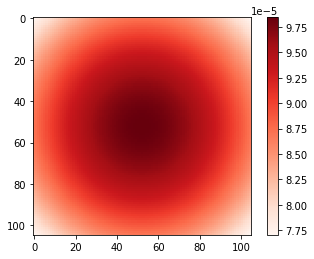

Kernel shape:  (105, 105)


In [25]:
# Define any symmetric kernel of size (105, 105)

kernel_symmetric = np.zeros(I.shape) # TO-BE-COMPLETED
kernel_symmetric = gaussian_kernel(105, 105)
plot_kernel(kernel_symmetric)


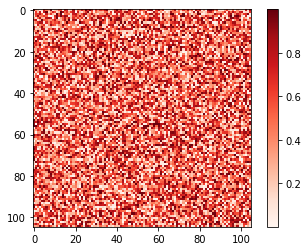

Kernel shape:  (105, 105)


In [26]:
# Define any asymmetric kernel of size (105, 105)

kernel_asymmetric = np.zeros(I.shape) # TO-BE-COMPLETED
kernel_asymmetric = np.random.rand(105,105)
plot_kernel(kernel_asymmetric)

In [35]:
# Filter the image with the symmetric kernel using the correlation function
    
filtered_image_symmetric = np.zeros(I.shape) # TO-BE-COMPLETED
filtered_image_asymmetric = np.zeros(I.shape) # TO-BE-COMPLETED
for i in range(0,3):
    correlation_image_symmetric = signal.correlate(I[:,:,i], kernel_symmetric, mode='same', method='auto')
    correlation_image_asymmetric = signal.correlate(I[:,:,i], kernel_asymmetric, mode='same', method='auto')



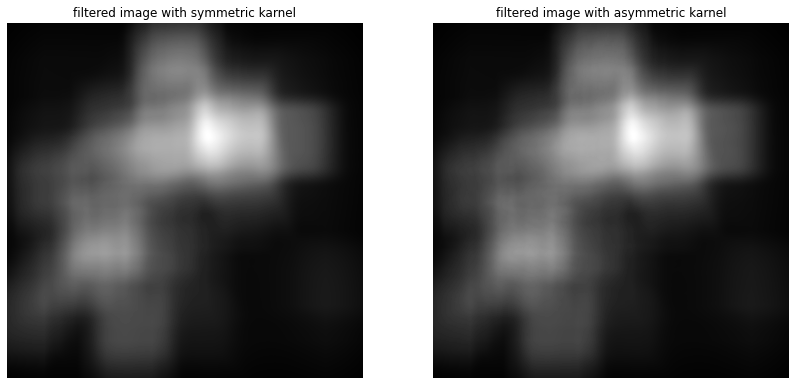

In [39]:
#Multiple plots using pyplot
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(correlation_image_symmetric, cmap="gray") 
ax1.title.set_text('filtered image with symmetric karnel')
ax1.axis("off")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(correlation_image_asymmetric, cmap="gray")
ax2.title.set_text('filtered image with asymmetric karnel')
ax2.axis("off")

plt.show()

### **Answer to Task 2.1** <br>

### Write your answer here. Compare the outputs.

Now, to *convolve* an ```image``` with a ```kernel``` all we need to do is call the ```signal.convolve``` function from the ```scipy``` library.

```
filtered_image = signal.convolve(image, kernel, mode='same', method='auto')```

The parameters work the same way as the ```signal.correlate```function.

In [40]:
# Filter the image with the asymmetric kernel using the convolution function

filtered_image_symmetric = np.zeros(I.shape) # TO-BE-COMPLETED
filtered_image_asymmetric = np.zeros(I.shape) # TO-BE-COMPLETED
for i in range(0,3):
    filtered_image_symmetric = signal.convolve(I[:,:,i], kernel_symmetric, mode='same', method='auto')
    filtered_image_asymmetric = signal.convolve(I[:,:,i], kernel_asymmetric, mode='same', method='auto')

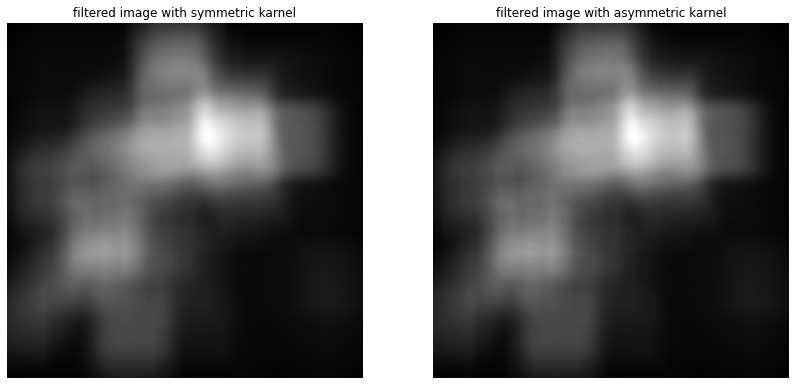

In [41]:
#Multiple plots using pyplot
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(filtered_image_symmetric, cmap="gray") 
ax1.title.set_text('filtered image with symmetric karnel')
ax1.axis("off")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(filtered_image_asymmetric, cmap="gray")
ax2.title.set_text('filtered image with asymmetric karnel')
ax2.axis("off")

plt.show()

### **Answer to Task 2.2** <br>

### Write your answer here. Compare the outputs.

## **Task 3: Edge Pair Detector** <br>
### Try to come up with two 3 x 3 filter kernels which are able to detect ***only the parallel pair of edges*** in the following image<br>

![](https://drive.google.com/uc?export=view&id=1a1CXbuC8A2FbyFvZovJMXERUijpatecU)

[The image can be downloaded from here: https://drive.google.com/file/d/1a1CXbuC8A2FbyFvZovJMXERUijpatecU/view?usp=sharing]

*Hint: No mathematical derivation is necessary. Just try devising the kernels using the same intuitions used behind the horizontal and vertical edge detector kernels. Coming up with a filter kernel means to determine the 9 filter coefficients of the 3x3 filer kernel.*

In [53]:
# Download the image from the drive link above and upload it to your current working directory in colab. Then load the image

image = imread('/content/diamond2.jpg') # TO-BE-COMPLETED

image = image/255

In [84]:
# define the 2 custom kernels by replacing the "?"s with your values and uncomment the next few lines of code in this cell

kernel_1 = np.array([[.4 ,.1, 0], # TO-BE-COMPLETED
                      [.1, 0, -.1], # TO-BE-COMPLETED
                      [0,-.1, -.4]]) # TO-BE-COMPLETED

kernel_2 = np.array([[0, -.4, -.1], # TO-BE-COMPLETED
                      [.1, 0, -.1], # TO-BE-COMPLETED
                      [.4, .1, 0]]) # TO-BE-COMPLETED

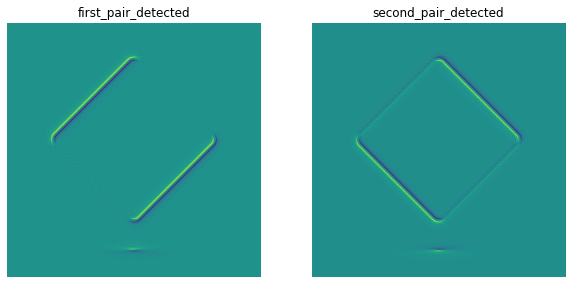

In [85]:
# detect the 2 parallel pair of edges and plot them side by side in a 1x2 grid subplot

# detect the first pair using image filtering with kernel_1

first_pair_detected = np.zeros(image.shape) # TO-BE-COMPLETED
for i in range(0,3):
    first_pair_detected = signal.convolve(image[:,:,i], kernel_1, mode='same', method='auto') 


# detect the second pair using image filtering with kernel_2

second_pair_detected = np.zeros(image.shape)  # TO-BE-COMPLETED

for i in range(0,3):
    second_pair_detected = signal.convolve(image[:,:,i], kernel_2, mode='same', method='auto') 

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(first_pair_detected) 
ax1.title.set_text('first_pair_detected')
ax1.axis("off")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(second_pair_detected)
ax2.title.set_text('second_pair_detected')
ax2.axis("off")
plt.show()

### **Answer to Task 3** <br>

### Write your answer here. Which filters you came up with and why? How did you choose the coefficients? Are your kernels unique or there can be other kernels which can accomplish the same task?


#Answers

1)the filters are built up observering the orientation of the edge pairs 
2)the coffecients were choosen randomly
3) these kernels are unique to the specific task and other kernels wont work 

## **Task 4: Image Denoising** <br>
### Take something.jpg image and corrupt it with *gaussian noise* of 0 mean and 0.2 variance. Denoise the image using:

1.   Total Variation Denoising (TVD)
2.   Bilateral Filtering (BF)

Feel free to experiment with the different filter parameters and try to come up with a cleaner image. Fianlly, comapre the MSE between the denoised images and the original uncorrupted image.

something.jpg can be downloaded from here: https://drive.google.com/file/d/1KgoZJDsTIW_NMh8LJ5oUneAQkIQsfzKT/view?usp=sharing


In [91]:
# Download the image from the drive link above and upload it to your current working directory in colab
# Then load the image "something.jpg"

image2 = imread('/content/something.jpg') # TO-BE-COMPLETED

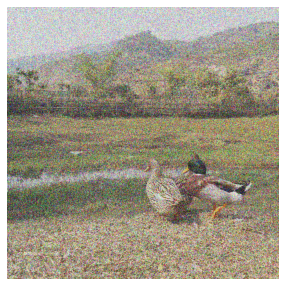

Image shape:  (1012, 1012, 3)


In [92]:
# corrupt the original image

image_noisy = random_noise(image2, mode="gaussian",mean =0, var=0.2) # TO-BE-COMPLETED
plot_image(image_noisy)

In [87]:
#random_noise?

In [94]:
# import the bilateral filter

from skimage.restoration import denoise_bilateral # TO-BE-COMPLETED
from skimage.restoration import denoise_tv_chambolle


In [ ]:
# clean the image using TVD

image_denoised_tvd = np.zeros(image2.shape) # TO-BE-COMPLETED
image_denoised_tvd = denoise_tv_chambolle(image_noisy,
                                       weight=.0000001, eps=0.0001, n_iter_max=1000, multichannel=True)
#plot_image(image_denoised_tvd)

In [161]:
# clean the image using BF

image_denoised_bf = np.zeros(image2.shape) # TO-BE-COMPLETED

image_denoised_bf = denoise_bilateral(image_noisy, win_size=5, 
                                           sigma_color=10, sigma_spatial=1000, multichannel=True)

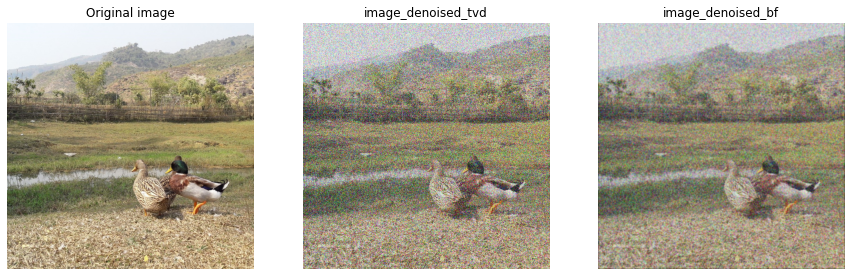

In [162]:
# plot image, image_denoised_tvd & image_denoised_bf side by side in a 1x3 grid subplot
# Original image added with sharpening laplace mask

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(image2, cmap="gray") 
ax1.title.set_text('Original image')
ax1.axis("off")

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(image_denoised_tvd, cmap="gray")
ax2.title.set_text('image_denoised_tvd')
ax2.axis("off")

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(image_denoised_bf , cmap="gray")
ax3.title.set_text('image_denoised_bf')
ax3.axis("off")

plt.show()

code reference for MSE : https://www.pyimagesearch.com/2014/09/15/python-compare-two-images/


In [159]:
def mse(imageA, imageB):

	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	

	return err

In [163]:
# compute the MSE


mse_tvd = mse(image2,image_denoised_tvd) # TO-BE-COMPLETED
mse_bf = mse(image2,image_denoised_bf)  # TO-BE-COMPLETED
print(mse_tvd)
print(mse_bf)

75509.95790748896
75520.05387299048


### **Answer to Task 4** <br>

### Write your answer here. Briefly explain your findings both qualitatively (which one looks better) and quantitatively (which one has a better MSE). Which parameters did you tweak? How did that impact the end result?

#Answers
Visually , Bilateral filtering looks better than Total Variation Denoising, 
however, Total Variation Denoising has a better MSE than Bilateral filtering
##Total Variation Denoising
for reducing the weight helped get a better result, however other parameters did not affect much
##Bilateral filtering
reducing the window size helped with the results 


## **The END**